In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
def load_distance_data(file_paths):
    distances = []
    for file_path in file_paths:
        saltbr = np.loadtxt(file_path)
        distance_saltbr = saltbr[:, 1]
        distances.append(distance_saltbr)
    return distances

In [3]:

def extract_labels(file_paths):

    labels = []
    for file_path in file_paths:
        # Extract the file name without extension
        file_name = os.path.basename(file_path)
        # Extract the relevant part of the file name
        label = file_name.split('saltbr-')[-1].split('.dat')[0]
        labels.append(label)
    return labels


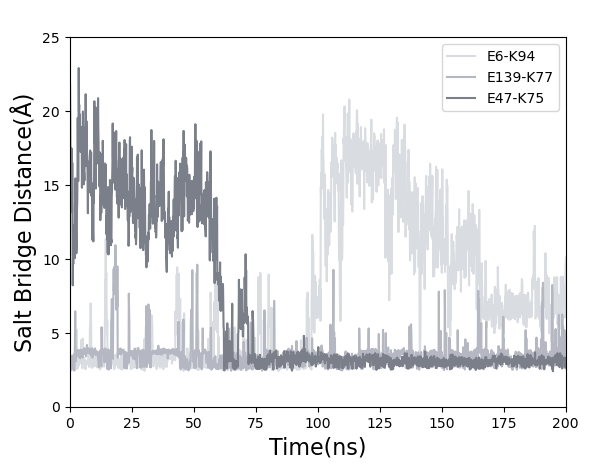

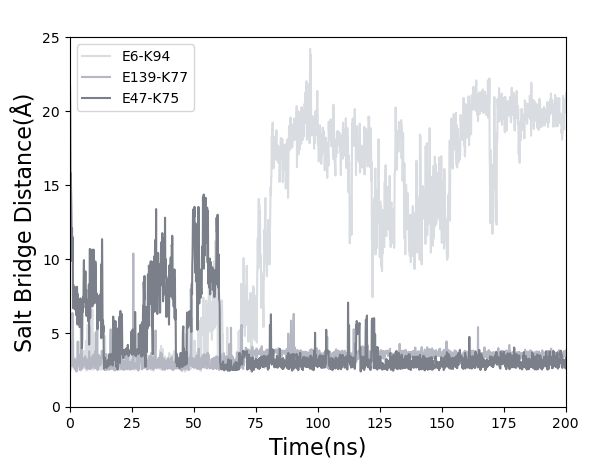

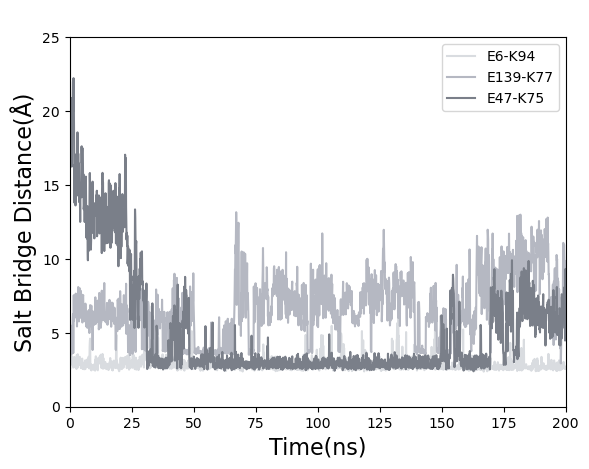

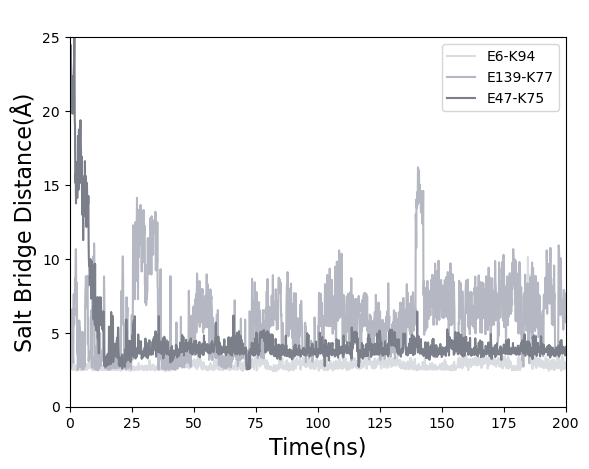

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_distance_data(file_paths):
    """
    Loads distance data from specified file paths.
    
    file_paths: list of strings, paths to the data files
    
    Returns:
    distances: list of arrays, each array containing the distance data from one file
    """
    distances = []
    for file_path in file_paths:
        saltbr = np.loadtxt(file_path)
        distance_saltbr = saltbr[:, 1]
        distances.append(distance_saltbr)
    return distances

def extract_labels(file_paths):
    """
    Extracts labels from the file paths, but converts 3-letter residue codes
    to 1-letter codes (e.g., GLU6-LYS94 -> E6-K94).
    
    file_paths: list of strings, paths to the data files
    
    Returns:
    labels: list of strings, extracted labels
    """
    aa3_to_aa1 = {
        "ALA": "A", "ARG": "R", "ASN": "N", "ASP": "D", "CYS": "C",
        "GLN": "Q", "GLU": "E", "GLY": "G", "HIS": "H", "ILE": "I",
        "LEU": "L", "LYS": "K", "MET": "M", "PHE": "F", "PRO": "P",
        "SER": "S", "THR": "T", "TRP": "W", "TYR": "Y", "VAL": "V"
    }

    labels = []
    for file_path in file_paths:
        # Extract the file name without extension
        file_name = os.path.basename(file_path)
        # Extract the relevant part of the file name
        raw = file_name.split('saltbr-')[-1].split('.dat')[0]  # e.g. GLU6-LYS94

        parts = raw.split('-')
        if len(parts) == 2:
            left, right = parts

            left_aa3, left_num = left[:3], left[3:]
            right_aa3, right_num = right[:3], right[3:]

            left_aa1 = aa3_to_aa1.get(left_aa3, left_aa3)
            right_aa1 = aa3_to_aa1.get(right_aa3, right_aa3)

            label = f"{left_aa1}{left_num}-{right_aa1}{right_num}"
        else:
            label = raw

        labels.append(label)

    return labels

def plot_distances(distances, labels, colors, xlim=None, ylim=None, xlabel='Time(ns)', ylabel='Salt Bridge Distance(Å)', title=None, save_path=None):

    for distance, label, color in zip(distances, labels, colors):
        plt.plot(range(len(distance)), distance, label=label, color=color)
    
    # Set title and labels
    if title:
        plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    
    # Set x and y axis limits
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    
    # Customize x-axis labels
    plt.xticks(ticks=[0,  250, 500, 750, 1000,  1250, 1500, 1750, 2000], 
               labels=['0','25','50', '75','100','125','150', '175','200'])

    # Add legend (so labels appear)
    plt.legend(loc='best')
    
    # Display the plot
    if save_path:
        plt.savefig(save_path)
    plt.show()
    plt.close()

def process_directory(directory, selected_files, color_scheme, title, save_name):
    file_paths = [os.path.join(directory, file) for file in selected_files if os.path.exists(os.path.join(directory, file))]
    distances = load_distance_data(file_paths)
    labels = extract_labels(file_paths)
    plot_distances(distances, labels, color_scheme, xlim=(0, 2000), ylim=(0, 25), title=title, save_path=f'{save_name}.png')

# Define directories and color schemes
directories = {
    'apo_l_4': ['#d9dce0', '#b5b8c2', '#7a7f89'],
    'apo_p_4': ['#d9dce0', '#b5b8c2', '#7a7f89'],
    'holo_l_4': ['#d9dce0', '#b5b8c2', '#7a7f89'],
    'holo_p_4': ['#d9dce0', '#b5b8c2', '#7a7f89']
}

# Selected salt bridge files
selected_files = [
    'saltbr-GLU6-LYS94.dat', 
    'saltbr-GLU139-LYS77.dat', 
    'saltbr-GLU47-LYS75.dat'
]

# Process each directory
for directory, color_scheme in directories.items():
    process_directory(directory, selected_files, color_scheme, title=' ', save_name=directory)
